In [54]:
# Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline


In [55]:
from google.colab import files
uploaded = files.upload()

In [79]:
dataset = pd.read_csv('dataset_small.csv')
df = pd.DataFrame(dataset)

In [ ]:
dataset.head

In [58]:
dataset.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,...,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,2.284338,0.457123,0.171285,1.937522,0.014102,0.311177,0.033456,0.212959,0.004451,0.001535,...,1.110666,2.829619,1.630113,5056.676272,0.501373,0.303419,0.001279,0.002234,0.008287,0.522585
std,1.473209,1.339340,0.801919,2.037525,0.138156,1.159198,0.343272,1.130323,0.107352,0.089320,...,0.912962,1.377018,1.719554,7102.853538,0.500002,0.815315,0.037599,0.047927,0.090657,0.499494
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1191.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,9866.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
dataset.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

Text(0.5, 1.0, 'Frequency based on Phishing labels ')

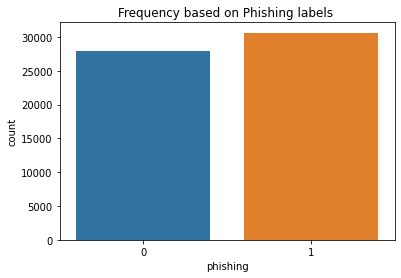

In [102]:
sns.countplot(dataset.phishing)
plt.title('Frequency based on Phishing labels ')


Text(0.5, 1.0, 'correlation among features')

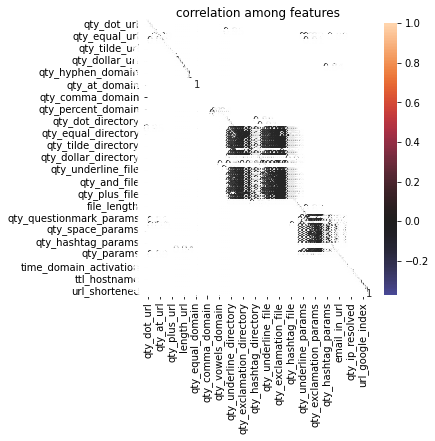

In [93]:
# df.corr() compute pairwise correlation of columns.Correlation shows how the two variables are related to each other.
# Positive values shows as one variable increases other variable increases as well. 
# Negative values shows as one variable increases other variable decreases.
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(), center=0, annot=True, linewidth=0.8)
ax.set_title('correlation among features')

<AxesSubplot:>

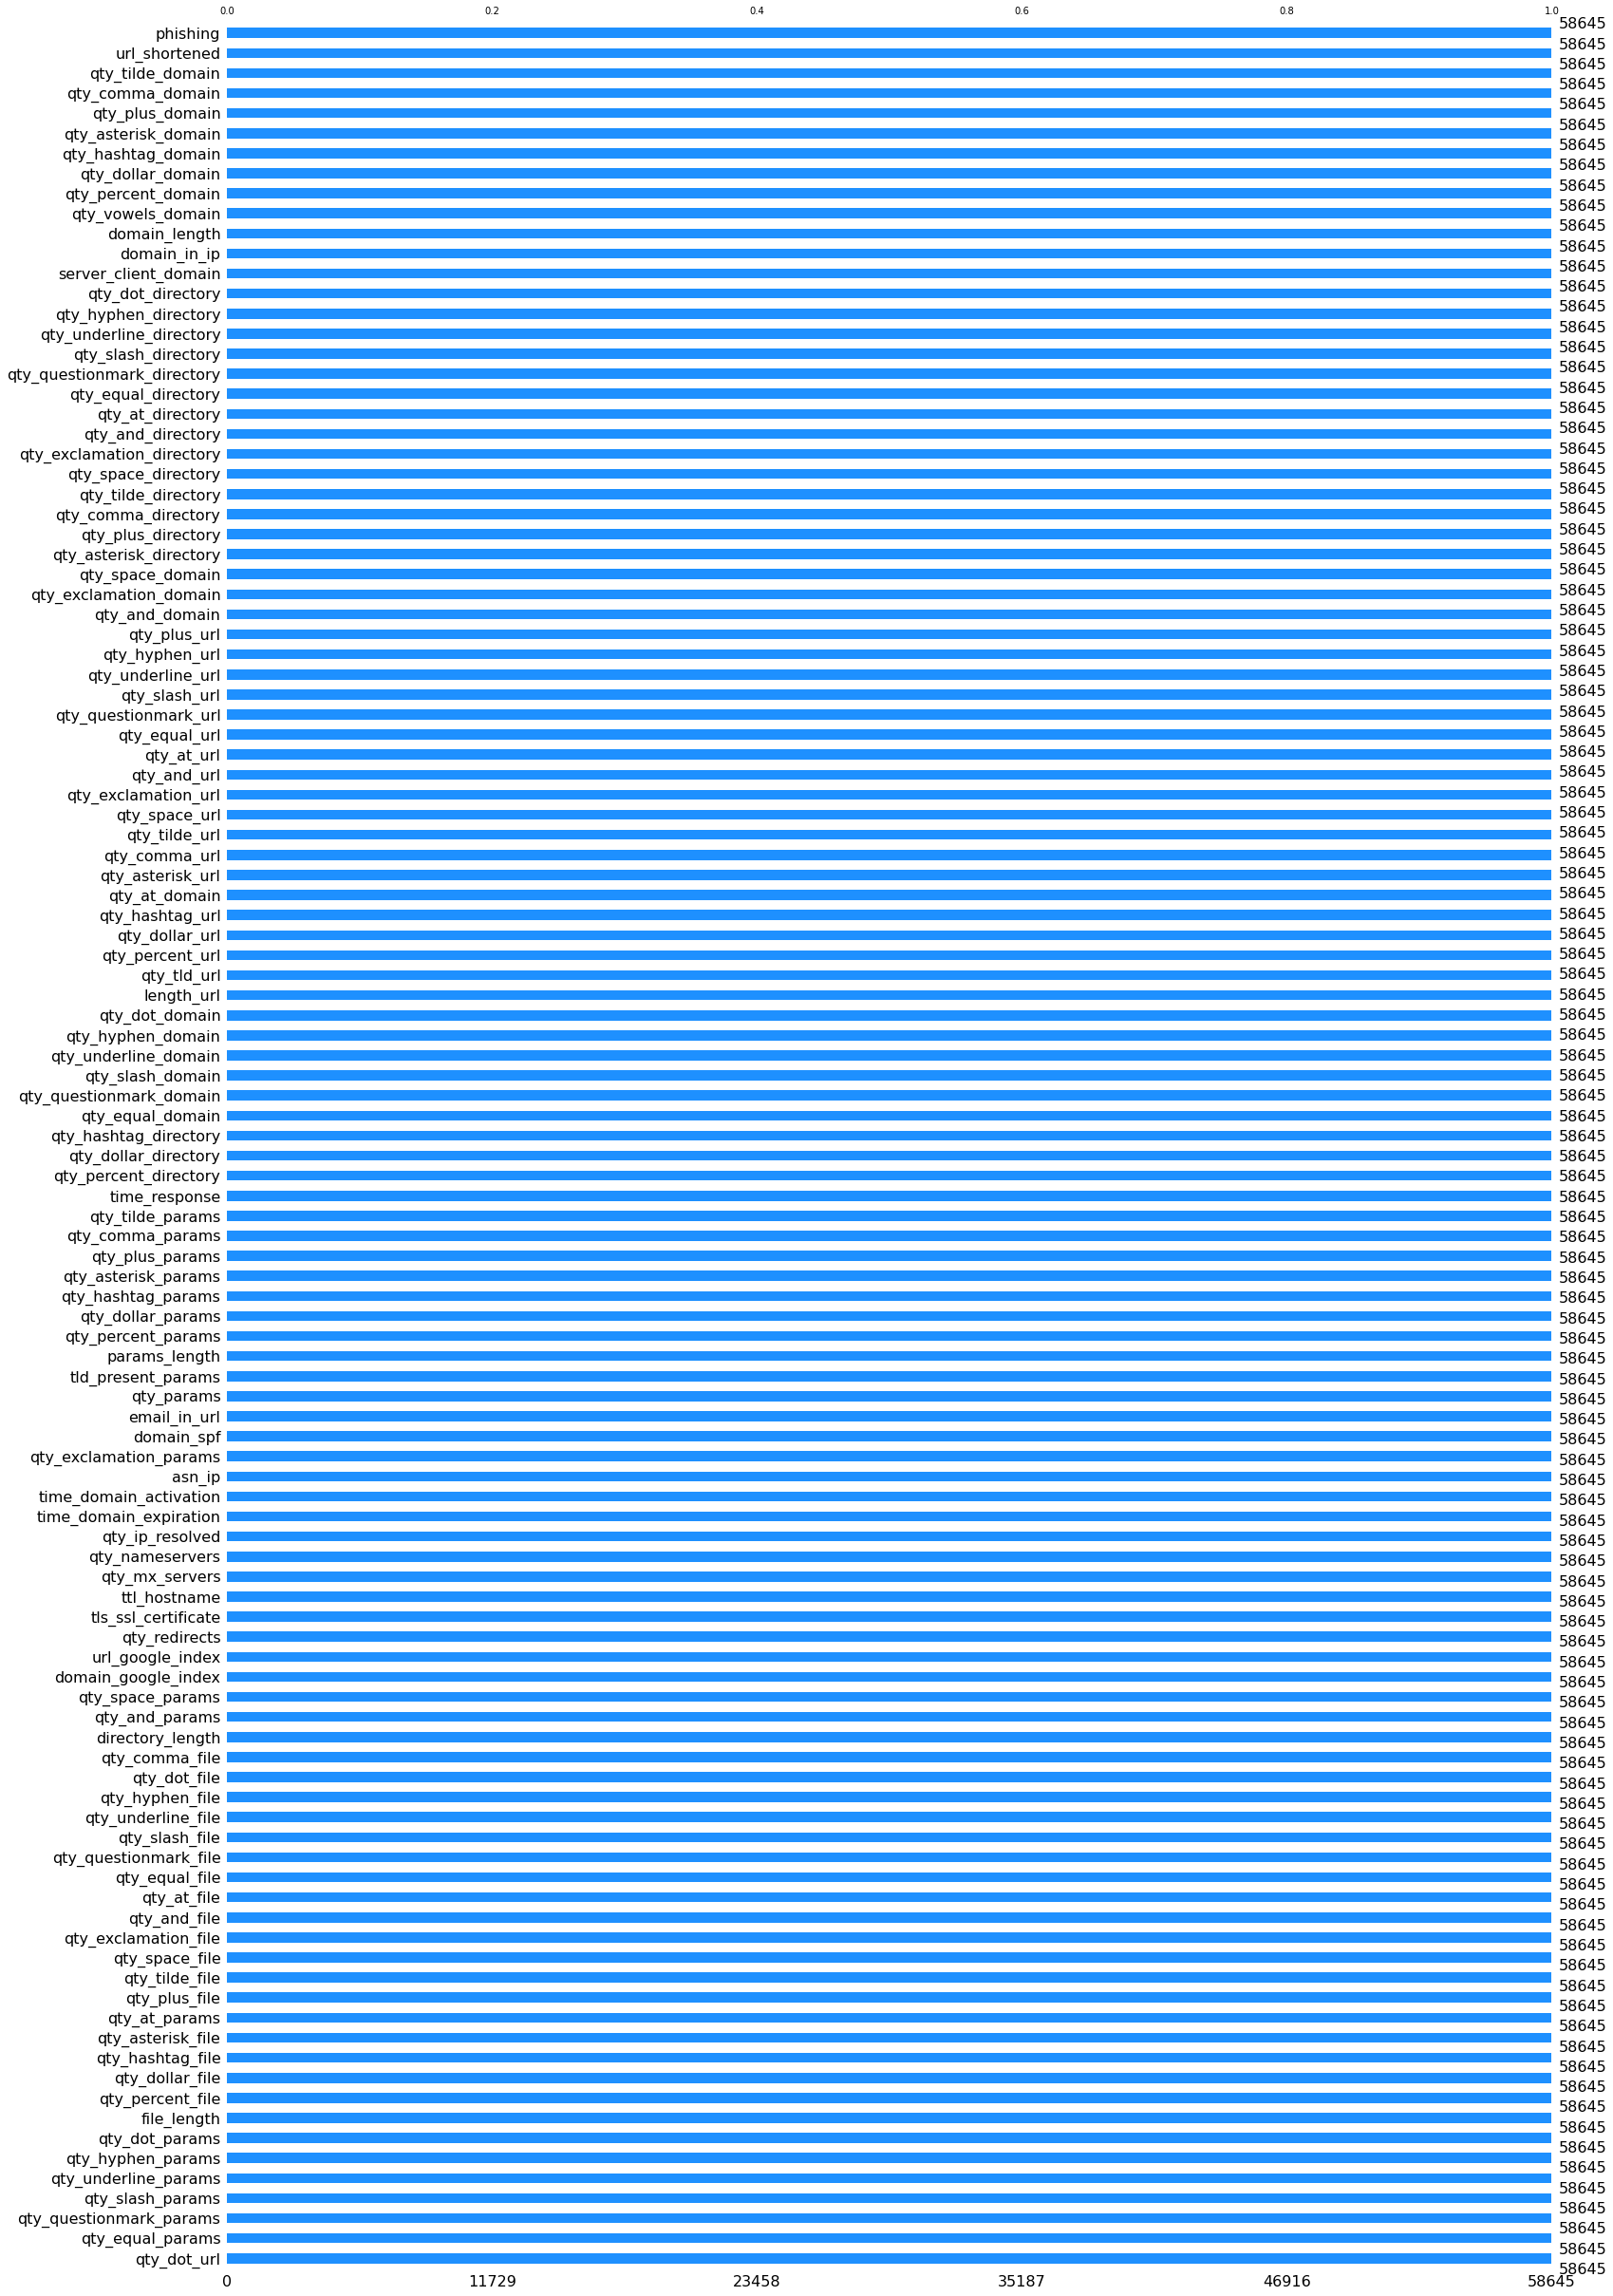

In [60]:
#length of dataset before dropping duplicate rows
# lengthbeforedropping=len(dataset)
# lengthbeforedropping

# plotting count of values per columns ignoring missing values for dataset
msno.bar(dataset,color='dodgerblue', sort='ascending')

In [61]:
#length of dataset after dropping duplicate rows

dataset.drop_duplicates(keep=False,inplace=True)
lengthafterdropping=len(dataset)
lengthafterdropping

56992

In [63]:
#Duplicate Rows
duplicaterows=lengthbeforedropping-lengthafterdropping
duplicaterows

0

In [64]:
#Replacing the value -1 with Nan and then deleting those rows

#Finding rows which contain the value -1
dataset.isin(['-1']).count()


C:\Users\Checkout\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


qty_dot_url             56992
qty_hyphen_url          56992
qty_underline_url       56992
qty_slash_url           56992
qty_questionmark_url    56992
                        ...  
qty_redirects           56992
url_google_index        56992
domain_google_index     56992
url_shortened           56992
phishing                56992
Length: 112, dtype: int64

In [65]:
#All the rows have the value -1 in atleast one of the columns, so lets remove the rows which have the maximum number of -1

In [68]:
# Data distribution of the features
cols={} 
for i in dataset.columns:
    print("- - - - - New Column Here- - - - - - - ")
    x=dataset[i].value_counts(normalize=True)
    print(x)
    if dataset[i].isin([-1]).any():
        cols[i]=x[-1] 

- - - - - New Column Here- - - - - - - 
2     0.501667
1     0.220294
3     0.178604
4     0.059587
5     0.017423
6     0.007896
7     0.003737
14    0.002334
8     0.001807
15    0.001509
9     0.001088
10    0.000842
16    0.000772
13    0.000649
12    0.000579
11    0.000561
17    0.000386
18    0.000105
22    0.000053
20    0.000053
24    0.000018
23    0.000018
19    0.000018
Name: qty_dot_url, dtype: float64
- - - - - New Column Here- - - - - - - 
0     0.766143
1     0.151916
2     0.037812
3     0.015142
4     0.008773
5     0.006089
6     0.003772
7     0.002720
8     0.001913
9     0.001316
10    0.001281
11    0.000930
12    0.000649
13    0.000439
14    0.000228
15    0.000175
17    0.000140
16    0.000088
21    0.000088
18    0.000070
19    0.000053
20    0.000053
31    0.000035
26    0.000035
23    0.000035
25    0.000035
24    0.000018
27    0.000018
35    0.000018
34    0.000018
Name: qty_hyphen_url, dtype: float64
- - - - - New Column Here- - - - - - - 
0     0.907741

Name: qty_and_params, dtype: float64
- - - - - New Column Here- - - - - - - 
-1     0.871350
 0     0.128211
 1     0.000351
 2     0.000053
 10    0.000018
 8     0.000018
Name: qty_exclamation_params, dtype: float64
- - - - - New Column Here- - - - - - - 
-1    0.871350
 0    0.128579
 1    0.000053
 4    0.000018
Name: qty_space_params, dtype: float64
- - - - - New Column Here- - - - - - - 
-1    0.871350
 0    0.128562
 1    0.000088
Name: qty_tilde_params, dtype: float64
- - - - - New Column Here- - - - - - - 
-1     0.871350
 0     0.127983
 1     0.000491
 3     0.000070
 2     0.000035
 4     0.000035
 7     0.000018
 11    0.000018
Name: qty_comma_params, dtype: float64
- - - - - New Column Here- - - - - - - 
-1    0.871350
 0    0.127123
 1    0.001105
 2    0.000228
 6    0.000070
 4    0.000053
 3    0.000053
 5    0.000018
Name: qty_plus_params, dtype: float64
- - - - - New Column Here- - - - - - - 
-1    0.871350
 0    0.128562
 1    0.000070
 4    0.000018
Name: qty_aste

###Removing the existing -1's and replacing with NAN in order to replace the values using different imputers.


In [69]:
for i,j in cols.items():
    if j>=0.8:
        dataset.drop(i,inplace=True,axis=1)

df_imp=dataset.replace(to_replace = -1,value =np.nan)

### HERE WE HAVE DROPPED ALL THE COLUMNS  WHICH HAVE A PERCENTAGE OF -1'S MORE 80%.


In [70]:
df_imp

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1.0,4,2,3598.0,0,0.0,0.0,0.0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1.0,4,1,3977.0,1,0.0,0.0,0.0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1.0,2,1,10788.0,0,0.0,0.0,0.0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1.0,2,1,14339.0,1,0.0,0.0,0.0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1.0,2,1,389.0,1,1.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1,0,0,5,0,1,0,0,0,0,...,1.0,2,2,563.0,0,0.0,0.0,0.0,0,1
58641,2,0,0,0,0,0,0,0,0,0,...,1.0,4,0,122.0,1,0.0,0.0,0.0,0,0
58642,5,6,3,6,0,2,1,1,0,0,...,1.0,2,1,1122.0,0,0.0,0.0,0.0,0,1
58643,2,0,0,0,0,0,0,0,0,0,...,5.0,2,5,299.0,1,1.0,0.0,0.0,0,0


<AxesSubplot:>

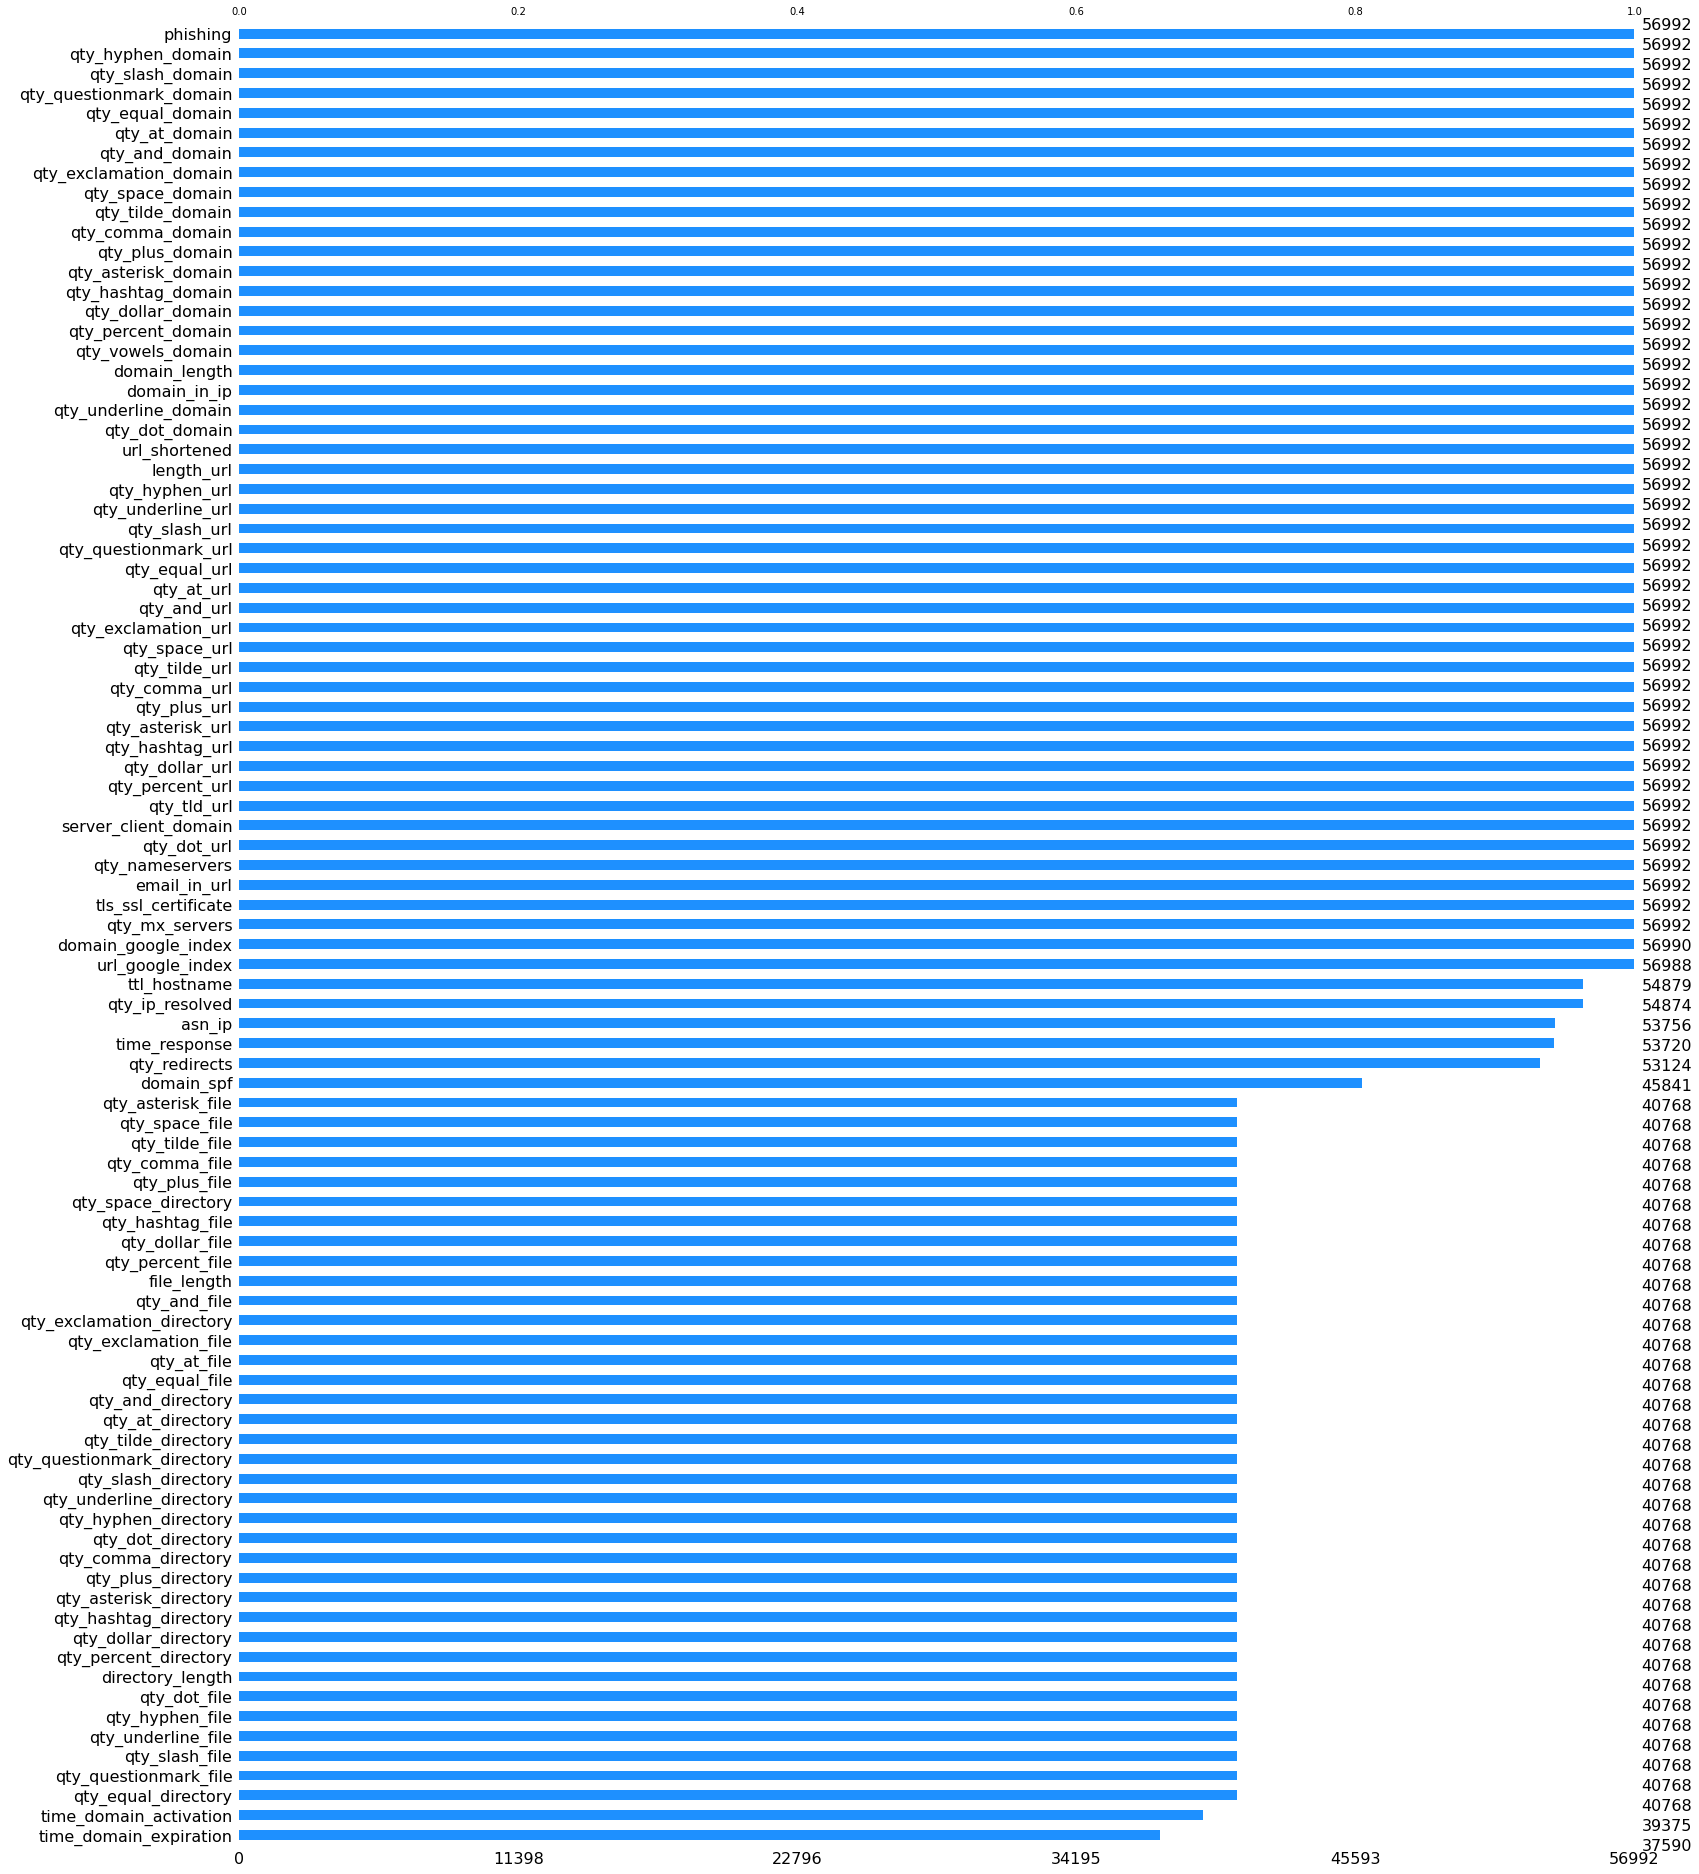

In [111]:
# visualizing the nullity by column
msno.bar(df_imp,color='dodgerblue', sort='ascending')


###Now We impute the data with different imputation techiniques which we later might use it for model training. The different imputation techniques which we can use are Mean, Mode, Median, KNN Imputation.

###Mean Imputation

In [71]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df_imp)
mean_imputed_df = imp_mean.transform(df_imp)
mean_imputed_df = pd.DataFrame(mean_imputed_df,columns = df_imp.columns)
mean_imputed_df.shape

(56992, 92)

In [72]:
mean_imputed_df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,...,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,2.292164,0.464416,0.174954,1.971856,0.013721,0.314676,0.034075,0.216136,0.004580,0.001579,...,1.250337,2.812447,1.669620,5400.749522,0.515757,0.438804,0.001246,0.002193,0.008528,0.534040
std,1.482672,1.354255,0.810073,2.035510,0.137359,1.169067,0.347697,1.141232,0.108895,0.090605,...,0.743877,1.374398,1.722182,7078.351722,0.499756,0.708799,0.035274,0.046782,0.091951,0.498844
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2387.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10522.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


###Mode Imputation

In [73]:
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(df_imp)
mostFreq_imputed_df = imp_mean.transform(df_imp)
mostFreq_imputed_df = pd.DataFrame(mostFreq_imputed_df,columns = df_imp.columns)
mostFreq_imputed_df.shape

(56992, 92)

In [74]:
mostFreq_imputed_df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,...,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,2.292164,0.464416,0.174954,1.971856,0.013721,0.314676,0.034075,0.216136,0.004580,0.001579,...,1.241034,2.812447,1.669620,5211.600225,0.515757,0.409022,0.001246,0.002193,0.008528,0.534040
std,1.482672,1.354255,0.810073,2.035510,0.137359,1.169067,0.347697,1.141232,0.108895,0.090605,...,0.745382,1.374398,1.722182,7143.689122,0.499756,0.717341,0.035274,0.046782,0.091951,0.498844
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1528.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10522.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


###Median Imputaion

In [75]:
imp_mean = SimpleImputer( strategy='median')
imp_mean.fit(df_imp)
median_imputed_df = imp_mean.transform(df_imp)
median_imputed_df = pd.DataFrame(median_imputed_df,columns = df_imp.columns)
median_imputed_df.shape

(56992, 92)

In [76]:
median_imputed_df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,...,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,2.292164,0.464416,0.174954,1.971856,0.013721,0.314676,0.034075,0.216136,0.004580,0.001579,...,1.241034,2.812447,1.669620,5267.139142,0.515757,0.409022,0.001246,0.002193,0.008528,0.534040
std,1.482672,1.354255,0.810073,2.035510,0.137359,1.169067,0.347697,1.141232,0.108895,0.090605,...,0.745382,1.374398,1.722182,7111.027903,0.499756,0.717341,0.035274,0.046782,0.091951,0.498844
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1797.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10522.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,16.000000,20.000000,86400.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


###KNN Imputation

In [77]:
import sklearn.neighbors._base
import sys

sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#usind KNN imputer
from sklearn.impute import KNNImputer
r=KNNImputer(n_neighbors=3)
knn_imputed_df=r.fit_transform(df_imp)
knn_imputed_df=pd.DataFrame(knn_imputed_df,columns=df_imp.columns)